# Machine Learning

## 1) Creando Set de Entrenamiento

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

%matplotlib inline
plt.style.use('default')

In [2]:
#Capitales de los Estados de México
capitales=['Aguascalientes','Mexicali','La Paz','Campeche','Tuxtla Gutiérrez','Chihuahua','Saltillo','Colima','Durango','Guanajuato','Chilpancingo de los Bravo','Pachuca','Guadalajara','Toluca','Morelia','Cuernavaca','Tepic','Monterrey','Oaxaca de Juárez','Puebla','Querétaro','Chetumal','San Luis Potosí','Culiacán','Hermosillo','Villahermosa','Victoria','Tlaxcala','Xalapa','Mérida','Zacatecas','Cuauhtémoc']

In [3]:
#Zonas de Mexico
nor_oeste=['Baja California Sur','Baja California Norte','Chihuahua','Durango','Sinaloa','Sonora']
nor_este=['Coahuila','Nuevo León','Tamaulipas']
occidente=['Nayarit','Jalisco','Colima','Michoacán']
oriente=['Puebla','Veracruz','Tlaxcala','Hidalgo']
centro_norte=['Aguascalientes','Guanajuato','San luis Potosí','Zacatecas','Querétaro']
centro_sur=['Morelos','Edo. de México','Distrito Federal']
sur_oeste=['Guerrero','Oaxaca','Chiapas']
sur_este=['Tabasco','Campeche','Quintana Roo','Yucatán']

In [4]:
#Función que establece si una ciudad se encuentra en la capital del estado
def EstaEnCapital(Ciudad):
    for capital in capitales:
        if(Ciudad==capital):
            return 1
    return 0

In [5]:
def oneHotEncoding(df, columna):
    one_hot = pd.get_dummies(df[columna])
    df.drop(columna, axis=1, inplace=True)
    df = pd.concat([df, one_hot], axis=1)
    return df

In [6]:
#Creamos una función que según el mes y el dia, nos devuelve en que estación se encuentra
def fechaEstacion(mes,dia):
    if((mes==1) | (mes==2)):
        return 'Invierno'
    if(mes==3):
        if(dia<21):
            return 'Invierno'
        if(dia>=21):
            return 'Primavera'
    if((mes==4) | (mes==5)):
        return 'Primavera'
    if(mes==6):
        if(dia<21):
            return 'Primavera'
        if(dia>=21):
            return 'Verano'
    if((mes==7) | (mes==8)):
        return 'Verano'
    if(mes==9):
        if(dia<21):
            return 'Verano'
        if(dia>=21):
            return 'Otonio'
    if((mes==10) | (mes==11)):
        return 'Otonio'
    if(mes==12):
        if(dia<21):
            return 'Otonio'
        if(dia>=21):
            return 'Invierno'

In [7]:
#Función que determina en que Zona está dicha provincia
def EstadoARegion(provincia):
    for ciudad in nor_oeste:
        if(ciudad==provincia):
            return 'NorOeste'
    for ciudad in nor_este:
        if(ciudad==provincia):
            return 'NorEste'
    for ciudad in occidente:
        if(ciudad==provincia):
            return 'Occidente'
    for ciudad in oriente:
        if(ciudad==provincia):
            return 'Oriente'
    for ciudad in centro_norte:
        if(ciudad==provincia):
            return 'Centro_Norte'
    for ciudad in centro_sur:
        if(ciudad==provincia):
            return 'Centr_Sur'
    for ciudad in sur_oeste:
        if(ciudad==provincia):
            return 'SurOeste'
    for ciudad in sur_este:
        if(ciudad==provincia):
            return 'SurEste'

In [8]:
train=pd.read_csv('train.csv')
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [9]:
#Guardamos el promedio de las columnas para luego completar los NaNs
mean_antiguedad=train['antiguedad'].mean()
mean_habitaciones=train['habitaciones'].mean()
mean_garages=train['garages'].mean()
mean_banos=train['banos'].mean()
mean_metroscubiertos=train['metroscubiertos'].mean()
mean_metrostotales=train['metrostotales'].mean()
mean_idzona=train['idzona'].mean()

In [10]:
#Cambiamos el tipo de dato de algunas columnas para bajar el uso de memoria
train['antiguedad']=train['antiguedad'].astype('int32',errors='ignore')
train['habitaciones']=train['habitaciones'].astype('int32',errors='ignore')
train['banos']=train['banos'].astype('int32',errors='ignore')
train['gimnasio']=train['gimnasio'].astype('int32',errors='ignore')
train['usosmultiples']=train['usosmultiples'].astype('int32',errors='ignore')
train['piscina']=train['piscina'].astype('int32',errors='ignore')
train['escuelascercanas']=train['escuelascercanas'].astype('int32',errors='ignore')
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype('int32',errors='ignore')

In [11]:
train[['antiguedad']]=train[['antiguedad']].fillna(value=mean_antiguedad)
train[['habitaciones']]=train[['habitaciones']].fillna(value=mean_habitaciones)
train[['garages']]=train[['garages']].fillna(value=mean_garages)
train[['banos']]=train[['banos']].fillna(value=mean_banos)
train[['metroscubiertos']]=train[['metroscubiertos']].fillna(value=mean_metroscubiertos)
train[['metrostotales']]=train[['metrostotales']].fillna(value=mean_metrostotales)
train[['idzona']]=train[['idzona']].fillna(value=mean_idzona)

In [12]:
#Hacemos la conversión de fechas
train['Fecha']=pd.to_datetime(train['fecha'])
train.drop(columns={'fecha'},inplace=True)
train['Anio']=train['Fecha'].dt.year
train['Mes']=train['Fecha'].dt.month
train['Dia']=train['Fecha'].dt.day
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,Fecha,Anio,Mes,Dia
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,...,0,0,0,0,0,2273000.0,2015-08-23,2015,8,23
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,...,0,0,0,1,1,3600000.0,2013-06-28,2013,6,28
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.000000,3.0,2.0,...,0,0,0,0,0,1200000.0,2015-10-17,2015,10,17
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.000000,2.0,1.0,...,0,0,0,1,1,650000.0,2012-03-09,2012,3,9
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.000000,2.0,1.0,...,0,0,0,0,0,1150000.0,2016-06-07,2016,6,7


In [13]:
train['Esta_Capital']=train['ciudad'].apply(EstaEnCapital)
train['Esta_Avenida']=train.direccion.str.contains('AV|av|Avenida|avenida')
train[['Esta_Avenida']]=train[['Esta_Avenida']].fillna(value=3)
train.dropna(subset=['tipodepropiedad','provincia'],inplace=True)
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,piscina,escuelascercanas,centroscomercialescercanos,precio,Fecha,Anio,Mes,Dia,Esta_Capital,Esta_Avenida
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,...,0,0,0,2273000.0,2015-08-23,2015,8,23,0,True
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,...,0,1,1,3600000.0,2013-06-28,2013,6,28,0,True
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.000000,3.0,2.0,...,0,0,0,1200000.0,2015-10-17,2015,10,17,0,False
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.000000,2.0,1.0,...,0,1,1,650000.0,2012-03-09,2012,3,9,0,False
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.000000,2.0,1.0,...,0,0,0,1150000.0,2016-06-07,2016,6,7,0,False


In [14]:
#Aplicamos las funciones en cuestión
train['Estacion']=train.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)
train['Zona']=train['provincia'].apply(EstadoARegion)

In [15]:
train = oneHotEncoding(train,'provincia')
train = oneHotEncoding(train,'tipodepropiedad')
train = oneHotEncoding(train,'Estacion')
train = oneHotEncoding(train,'Zona')

In [16]:
train.drop(columns={'direccion','titulo','descripcion','Fecha','id','ciudad','lat','lng','Dia'},inplace=True)
train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,gimnasio,usosmultiples,piscina,...,Primavera,Verano,Centr_Sur,Centro_Norte,NorEste,NorOeste,Occidente,Oriente,SurEste,SurOeste
0,8.116114,2.0,1.0,2.0,80.0,80.0,23533.0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,10.000000,3.0,2.0,2.0,268.0,180.0,24514.0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,5.000000,3.0,2.0,2.0,144.0,166.0,48551.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.000000,2.0,1.0,1.0,63.0,67.0,53666.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,10.000000,2.0,1.0,1.0,95.0,95.0,47835.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## 2) Aplicación de Algoritmos

Utilizamos Mean Absolute Error (MAE) para ver la precisión de nuestra preducción, cuya formula es:

<img src="https://miro.medium.com/max/780/1*8DXbECB9pnKxTpIvuVD-vg.png">

In [17]:
datos=train.drop(columns={'precio','Garage','Hospedaje'})
precio=train['precio']
datos.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,gimnasio,usosmultiples,piscina,...,Primavera,Verano,Centr_Sur,Centro_Norte,NorEste,NorOeste,Occidente,Oriente,SurEste,SurOeste
0,8.116114,2.0,1.0,2.0,80.0,80.0,23533.0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,10.000000,3.0,2.0,2.0,268.0,180.0,24514.0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,5.000000,3.0,2.0,2.0,144.0,166.0,48551.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.000000,2.0,1.0,1.0,63.0,67.0,53666.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,10.000000,2.0,1.0,1.0,95.0,95.0,47835.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [18]:
#Preparo el set de Test para ser utilizado por los algoritmos
test_final=pd.read_csv('test.csv')
IDS=test_final[['id']].copy()
test_final['Fecha']=pd.to_datetime(test_final['fecha'])
test_final.drop(columns={'fecha'},inplace=True)
test_final['Anio']=test_final['Fecha'].dt.year
test_final['Mes']=test_final['Fecha'].dt.month
test_final['Dia']=test_final['Fecha'].dt.day
test_final['Esta_Avenida']=test_final.direccion.str.contains('AV|av|Avenida|avenida')
test_final['Esta_Capital']=test_final['ciudad'].apply(EstaEnCapital)

In [19]:
#Relleno los NaNs
test_final[['antiguedad']] = test_final[['antiguedad']].fillna(value=mean_antiguedad)
test_final[['habitaciones']] = test_final[['habitaciones']].fillna(value=mean_habitaciones)
test_final[['garages']] = test_final[['garages']].fillna(value=mean_garages)
test_final[['banos']] = test_final[['banos']].fillna(value=mean_banos)
test_final[['metroscubiertos']] = test_final[['metroscubiertos']].fillna(value=mean_metroscubiertos)
test_final[['metrostotales']] = test_final[['metrostotales']].fillna(value=mean_metrostotales)
test_final[['idzona']] = test_final[['idzona']].fillna(value=mean_idzona)
test_final[['Esta_Avenida']]=test_final[['Esta_Avenida']].fillna(value=3)

In [20]:
#Aplicamos las funciones en cuestión
test_final['Estacion']=test_final.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)
test_final['Zona']=test_final['provincia'].apply(EstadoARegion)

In [21]:
test_final = oneHotEncoding(test_final,'provincia')
test_final = oneHotEncoding(test_final,'tipodepropiedad')
test_final = oneHotEncoding(test_final,'Estacion')
test_final = oneHotEncoding(test_final,'Zona')

In [22]:
test_final.drop(columns={'id','Dia','titulo','ciudad','descripcion','direccion','Fecha','lat','lng'},inplace=True)

In [23]:
test_final.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,gimnasio,usosmultiples,piscina,...,Primavera,Verano,Centr_Sur,Centro_Norte,NorEste,NorOeste,Occidente,Oriente,SurEste,SurOeste
0,29.000000,3.0,1.546874,4.0,300.0,176.765145,2.423468e+06,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
1,8.116114,1.0,1.000000,1.0,67.0,67.000000,1.138510e+05,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,2.0,1.000000,2.0,87.0,100.000000,2.362000e+04,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
3,2.000000,2.0,2.000000,2.0,86.0,86.000000,1.293470e+05,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,10.000000,2.0,1.000000,1.0,80.0,76.000000,5.712500e+04,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0


In [26]:
#Separamos el set de entrenamiento en set de entrenamiento y de validacion
test_size = 0.33
random_state = 1
datos_train , datos_test, precio_train, precio_test = train_test_split(datos,precio,test_size = test_size,random_state = random_state)

### 2.1) Árboles de Decisión

In [27]:
tree = DecisionTreeRegressor()

In [28]:
tree.fit(datos_train,precio_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [29]:
prediccion_tree_validacion=tree.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_tree_validacion))

Mean Absolute Error:  824306.2834520274


In [30]:
prediccion_final=tree.predict(test_final)
entregable_tree=IDS[['id']].copy()
entregable_tree['target']=prediccion_final
entregable_tree.set_index('id',inplace=True)
entregable_tree.head()

,target
id,
4941,3000000.0
51775,850000.0
115253,2400000.0
299321,1638000.0
173570,395000.0


In [31]:
entregable_tree.to_csv('ADD_11.csv')

### 2.2) KNN

In [32]:
#Busco el valor de K que nos de el menor error
rango_k = range(1, 60)
metricas=[]

for k in rango_k:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(datos_train,precio_train)
    prediccion_knn_validacion=knn.predict(datos_test)
    error=mean_absolute_error(precio_test,prediccion_knn_validacion)
    print('K=',k,'- Mean Absolute Error: ',error)
    metricas.append(error)

K= 1 - Mean Absolute Error:  853292.3443988122
K= 2 - Mean Absolute Error:  799814.4734125229
K= 3 - Mean Absolute Error:  780978.4798045533
K= 4 - Mean Absolute Error:  773117.257676755
K= 5 - Mean Absolute Error:  769497.7165476716
K= 6 - Mean Absolute Error:  767662.1839935974
K= 7 - Mean Absolute Error:  765962.7153634386
K= 8 - Mean Absolute Error:  765878.1658905668
K= 9 - Mean Absolute Error:  765783.4646925436
K= 10 - Mean Absolute Error:  766510.1858646617
K= 11 - Mean Absolute Error:  767538.2931319897
K= 12 - Mean Absolute Error:  768118.9975895621
K= 13 - Mean Absolute Error:  768974.1747024317
K= 14 - Mean Absolute Error:  770022.9053317567
K= 15 - Mean Absolute Error:  770986.0751904971
K= 16 - Mean Absolute Error:  772063.4324350792
K= 17 - Mean Absolute Error:  773090.0871295886
K= 18 - Mean Absolute Error:  774234.504568143
K= 19 - Mean Absolute Error:  775234.1274517564
K= 20 - Mean Absolute Error:  776272.2894237696
K= 21 - Mean Absolute Error:  777194.9821492507
K= 

Text(0,0.5,'Error')

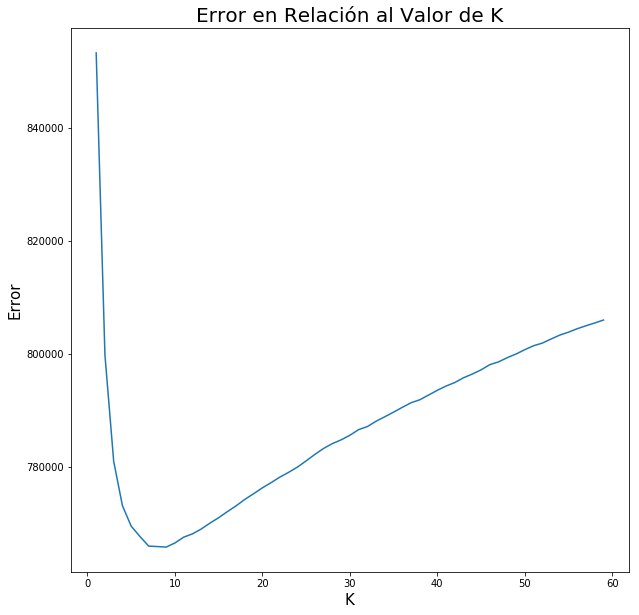

In [45]:
#Ploteamos para ver una mejor representacion
plt.subplots(figsize=(10,10))
plt.plot(rango_k,metricas)
plt.title("Error en Relación al Valor de K",fontsize=20)
plt.xlabel("K",fontsize=15)
plt.ylabel("Error",fontsize=15)

Vemos que entre los valores k=7 hasta 9 tenemos el menor error, por lo que probamos con este último.

In [46]:
knn = KNeighborsRegressor(n_neighbors=9)

In [47]:
knn.fit(datos_train,precio_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')

In [48]:
prediccion_knn=knn.predict(test_final)

In [49]:
entregable_knn=IDS[['id']].copy()
entregable_knn['target']=prediccion_knn
entregable_knn.set_index('id',inplace=True)
entregable_knn.head()

,target
id,
4941,3.673778e+06
51775,1.211556e+06
115253,2.372379e+06
299321,1.910663e+06
173570,9.611111e+05


In [50]:
entregable_knn.to_csv('KNN_05.csv')